* Once a video is watched in youtube, all similar videos come as suggestion or recommendations and this is content based filtering
* In Amazon if I select Iphone in the cart, in the recommendation for add-on there will be earphones, power bank, this is collaborative filtering

In [1]:
import pandas as pd
import numpy as np

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_df = pd.read_csv('data.txt', sep='\t', names = column_names)
raw_df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movie_id_df = pd.read_csv('movie_id_title.txt')
movie_id_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
merged_df = movie_id_df.merge(raw_df, on='item_id')
merged_df.head()

,item_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


### EDA

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
# average rating for each movie title
merged_df.groupby(['title'])['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [9]:
# average count for each movie title
merged_df.groupby(['title'])['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [10]:
ratings = pd.DataFrame(merged_df.groupby(['title'])['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [11]:
ratings['number_of_ratings'] = merged_df.groupby(['title'])['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


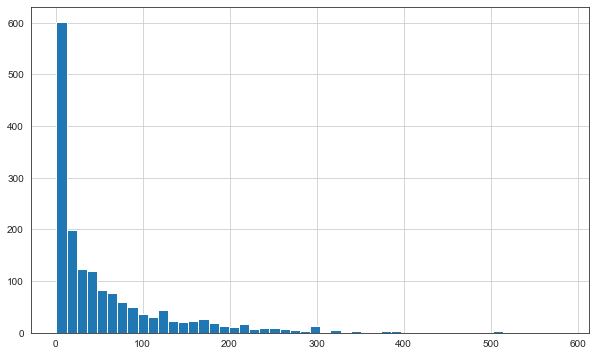

In [13]:
plt.figure(figsize=(10,6))
ratings['number_of_ratings'].hist(bins=50)

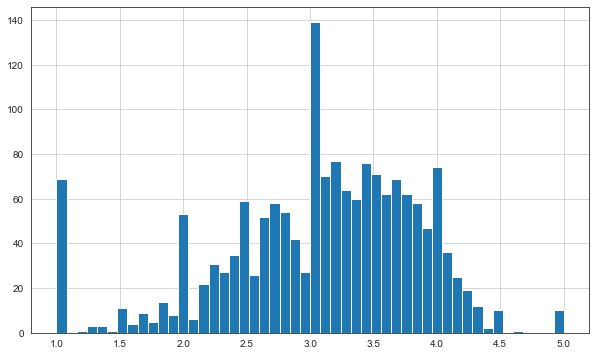

In [14]:
plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=50)

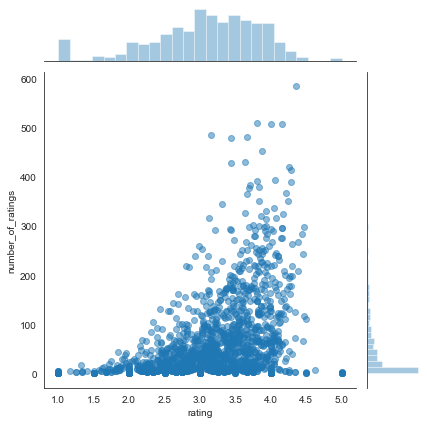

In [16]:
sns.jointplot(x='rating',y='number_of_ratings',data=ratings, alpha=0.5)

* Create a pivot table

In [17]:
movie_pivot_table = merged_df.pivot_table(index='user_id',
                                          columns='title',
                                          values='rating')
movie_pivot_table.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# fill null value in the dataframe with 0
movie_pivot_table.fillna(0.0, inplace=True)

In [43]:
# single movie correlation
star_wars_movie = movie_pivot_table['Return of the Jedi (1983)']
star_wars_movie

user_id
0      0.0
1      5.0
2      0.0
3      4.0
4      0.0
      ... 
939    0.0
940    3.0
941    5.0
942    0.0
943    4.0
Name: Return of the Jedi (1983), Length: 944, dtype: float64

In [44]:
# use correlation
similar_to_starwars = movie_pivot_table.corrwith(star_wars_movie)
similar_to_starwars.head()

title
'Til There Was You (1997)    0.036514
1-900 (1994)                -0.002317
101 Dalmatians (1996)        0.184427
12 Angry Men (1957)          0.169292
187 (1997)                  -0.009037
dtype: float64

In [45]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.sort_values(by='Correlation',ascending=False)

,Correlation
title,
Return of the Jedi (1983),1.000000
Star Wars (1977),0.746797
"Empire Strikes Back, The (1980)",0.548797
Raiders of the Lost Ark (1981),0.503323
Indiana Jones and the Last Crusade (1989),0.478037
...,...
"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",-0.118851
L.A. Confidential (1997),-0.125226
Ulee's Gold (1997),-0.147110
